In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint
import random
import json
import scipy.stats as st
# Import API key
from api_keys import weather_api_key



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [3]:
list(cities)

['avarua',
 'nizhneyansk',
 'victoria',
 'opuwo',
 'fort saint john',
 'castro',
 'cockburn town',
 'lagoa',
 'attawapiskat',
 'punta arenas',
 'aripuana',
 'kruisfontein',
 'ushuaia',
 'chokurdakh',
 'qasigiannguit',
 'belushya guba',
 'ahipara',
 'kotelnikovo',
 'pemba',
 'pedasi',
 'yithion',
 'bredasdorp',
 'samusu',
 'natal',
 'hilo',
 'mar del plata',
 'busselton',
 'faanui',
 'georgiyevka',
 'puerto ayora',
 'barentsburg',
 'thompson',
 'dabakala',
 'atuona',
 'saleaula',
 'barpali',
 'mataura',
 'kloulklubed',
 'rikitea',
 'hobart',
 'faya',
 'ponta do sol',
 'constitucion',
 'amderma',
 'nova olimpia',
 'tabiauea',
 'georgetown',
 'maxixe',
 'santa barbara',
 'morro bay',
 'ereymentau',
 'hithadhoo',
 'yellowknife',
 'sorland',
 'suez',
 'kupang',
 'koulikoro',
 'kaeo',
 'kaitangata',
 'albany',
 'praia da vitoria',
 'northam',
 'kamakwie',
 'pevek',
 'vaini',
 'vardo',
 'devils lake',
 'provideniya',
 'narsaq',
 'qaanaaq',
 'saskylakh',
 'batagay-alyta',
 'campo verde',
 'wan

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "metric"
lat = []
lng = []
City_Name = []


for city in cities:
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    response = requests.get(query_url + city).json()
    print(f"Retrieving results for {city}:")
    try:
        lat.append(response["coord"]['lat'])
        lng.append(response["coord"]['lon'])
        City_Name.append(response["name"])
        print(f"Successfully appending results for {city}:")
    except:
        print("Missing field/result... skipping.")
        pass

one_dict = {
    "City": City_Name,
    "Lat": lat,
    "Lng": lng
}
one_data = pd.DataFrame(one_dict)

Retrieving results for avarua:
Successfully appending results for avarua:
Retrieving results for nizhneyansk:
Missing field/result... skipping.
Retrieving results for victoria:
Successfully appending results for victoria:
Retrieving results for opuwo:
Successfully appending results for opuwo:
Retrieving results for fort saint john:
Missing field/result... skipping.
Retrieving results for castro:
Successfully appending results for castro:
Retrieving results for cockburn town:
Successfully appending results for cockburn town:
Retrieving results for lagoa:
Successfully appending results for lagoa:
Retrieving results for attawapiskat:
Missing field/result... skipping.
Retrieving results for punta arenas:
Successfully appending results for punta arenas:
Retrieving results for aripuana:
Successfully appending results for aripuana:
Retrieving results for kruisfontein:
Successfully appending results for kruisfontein:
Retrieving results for ushuaia:
Successfully appending results for ushuaia:
R

Retrieving results for salalah:
Successfully appending results for salalah:
Retrieving results for arraial do cabo:
Successfully appending results for arraial do cabo:
Retrieving results for kodiak:
Successfully appending results for kodiak:
Retrieving results for illoqqortoormiut:
Missing field/result... skipping.
Retrieving results for takoradi:
Successfully appending results for takoradi:
Retrieving results for guarapari:
Successfully appending results for guarapari:
Retrieving results for waiouru:
Successfully appending results for waiouru:
Retrieving results for hofn:
Successfully appending results for hofn:
Retrieving results for lavrentiya:
Successfully appending results for lavrentiya:
Retrieving results for karratha:
Successfully appending results for karratha:
Retrieving results for roebourne:
Successfully appending results for roebourne:
Retrieving results for cruzilia:
Successfully appending results for cruzilia:
Retrieving results for oruro:
Successfully appending results 

Retrieving results for ribeira grande:
Successfully appending results for ribeira grande:
Retrieving results for toliary:
Missing field/result... skipping.
Retrieving results for pitimbu:
Successfully appending results for pitimbu:
Retrieving results for charters towers:
Successfully appending results for charters towers:
Retrieving results for fairbanks:
Successfully appending results for fairbanks:
Retrieving results for lubango:
Successfully appending results for lubango:
Retrieving results for aswan:
Successfully appending results for aswan:
Retrieving results for reconquista:
Successfully appending results for reconquista:
Retrieving results for qaqortoq:
Successfully appending results for qaqortoq:
Retrieving results for sao miguel do oeste:
Missing field/result... skipping.
Retrieving results for buraydah:
Successfully appending results for buraydah:
Retrieving results for metehara:
Missing field/result... skipping.
Retrieving results for vaitape:
Successfully appending results 

Retrieving results for yekaterinburg:
Successfully appending results for yekaterinburg:
Retrieving results for bambous virieux:
Successfully appending results for bambous virieux:
Retrieving results for komsomolskiy:
Successfully appending results for komsomolskiy:
Retrieving results for kazalinsk:
Missing field/result... skipping.
Retrieving results for breaza:
Successfully appending results for breaza:
Retrieving results for louisbourg:
Missing field/result... skipping.
Retrieving results for yabelo:
Successfully appending results for yabelo:
Retrieving results for ancud:
Successfully appending results for ancud:
Retrieving results for horadiz:
Successfully appending results for horadiz:
Retrieving results for westport:
Successfully appending results for westport:
Retrieving results for los llanos de aridane:
Successfully appending results for los llanos de aridane:
Retrieving results for karatau:
Successfully appending results for karatau:
Retrieving results for shelburne:
Successfu

Retrieving results for ondjiva:
Successfully appending results for ondjiva:
Retrieving results for ndele:
Successfully appending results for ndele:
Retrieving results for macaboboni:
Missing field/result... skipping.
Retrieving results for loa janan:
Successfully appending results for loa janan:
Retrieving results for socorro:
Successfully appending results for socorro:
Retrieving results for uruzgan:
Successfully appending results for uruzgan:
Retrieving results for singaparna:
Successfully appending results for singaparna:
Retrieving results for kalutara:
Successfully appending results for kalutara:
Retrieving results for awbari:
Successfully appending results for awbari:
Retrieving results for hamilton:
Successfully appending results for hamilton:
Retrieving results for hami:
Successfully appending results for hami:
Retrieving results for mys shmidta:
Missing field/result... skipping.
Retrieving results for tarogong:
Successfully appending results for tarogong:
Retrieving results fo

Retrieving results for yabrud:
Successfully appending results for yabrud:
Retrieving results for ocampo:
Successfully appending results for ocampo:
Retrieving results for sandur:
Successfully appending results for sandur:
Retrieving results for slave lake:
Successfully appending results for slave lake:
Retrieving results for honningsvag:
Successfully appending results for honningsvag:
Retrieving results for jumla:
Successfully appending results for jumla:
Retrieving results for pokhara:
Successfully appending results for pokhara:
Retrieving results for sioux lookout:
Successfully appending results for sioux lookout:
Retrieving results for alekseyevsk:
Successfully appending results for alekseyevsk:
Retrieving results for torbay:
Successfully appending results for torbay:
Retrieving results for changji:
Successfully appending results for changji:
Retrieving results for sistranda:
Successfully appending results for sistranda:
Retrieving results for erenhot:
Successfully appending results

In [5]:
one_data["Max Temp"] = ""
one_data["Humidity"] = ""
one_data["Cloudiness"] = ""
one_data["Wind speed"] = ""
one_data["Country"] = ""
one_data["Date"] = ""


NameError: name 'one_data' is not defined

In [8]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"

for index, row in one_data.iterrows():
    lat = one_data.loc[index, "Lat"]
    lng = one_data.loc[index, "Lng"]
    query_url_2 = f"{base_url}lat={lat}&lon={lng}&appid={weather_api_key}&units={units}&q="
    response = requests.get(query_url_2).json()
    print(f"Retrieving results for {index}:")
    try:
        one_data.loc[index, "Max Temp"] = response['main']['temp_max']
        one_data.loc[index, "Humidity"] = response['main']['humidity']
        one_data.loc[index, "Cloudiness"] = response['clouds']['all']
        one_data.loc[index, "Wind speed"] = response['wind']['speed']
        one_data.loc[index, "Country"] = response['sys']['country']
        one_data.loc[index, "Date"] = response['dt']
        print("Successfully appended results.")
    except:
        print("Missing field/result... skipping.")

Retrieving results for 0:
Successfully appended results.
Retrieving results for 1:
Successfully appended results.
Retrieving results for 2:
Successfully appended results.
Retrieving results for 3:
Successfully appended results.
Retrieving results for 4:
Successfully appended results.
Retrieving results for 5:
Successfully appended results.
Retrieving results for 6:
Successfully appended results.
Retrieving results for 7:
Successfully appended results.
Retrieving results for 8:
Successfully appended results.
Retrieving results for 9:
Successfully appended results.
Retrieving results for 10:
Successfully appended results.
Retrieving results for 11:
Successfully appended results.
Retrieving results for 12:
Successfully appended results.
Retrieving results for 13:
Successfully appended results.
Retrieving results for 14:
Successfully appended results.
Retrieving results for 15:
Successfully appended results.
Retrieving results for 16:
Successfully appended results.
Retrieving results for 1

Retrieving results for 141:
Successfully appended results.
Retrieving results for 142:
Successfully appended results.
Retrieving results for 143:
Successfully appended results.
Retrieving results for 144:
Successfully appended results.
Retrieving results for 145:
Successfully appended results.
Retrieving results for 146:
Successfully appended results.
Retrieving results for 147:
Successfully appended results.
Retrieving results for 148:
Successfully appended results.
Retrieving results for 149:
Successfully appended results.
Retrieving results for 150:
Successfully appended results.
Retrieving results for 151:
Successfully appended results.
Retrieving results for 152:
Successfully appended results.
Retrieving results for 153:
Successfully appended results.
Retrieving results for 154:
Successfully appended results.
Retrieving results for 155:
Successfully appended results.
Retrieving results for 156:
Successfully appended results.
Retrieving results for 157:
Successfully appended result

Retrieving results for 280:
Successfully appended results.
Retrieving results for 281:
Successfully appended results.
Retrieving results for 282:
Successfully appended results.
Retrieving results for 283:
Successfully appended results.
Retrieving results for 284:
Successfully appended results.
Retrieving results for 285:
Successfully appended results.
Retrieving results for 286:
Successfully appended results.
Retrieving results for 287:
Successfully appended results.
Retrieving results for 288:
Successfully appended results.
Retrieving results for 289:
Successfully appended results.
Retrieving results for 290:
Successfully appended results.
Retrieving results for 291:
Successfully appended results.
Retrieving results for 292:
Successfully appended results.
Retrieving results for 293:
Successfully appended results.
Retrieving results for 294:
Successfully appended results.
Retrieving results for 295:
Successfully appended results.
Retrieving results for 296:
Successfully appended result

Retrieving results for 419:
Successfully appended results.
Retrieving results for 420:
Successfully appended results.
Retrieving results for 421:
Successfully appended results.
Retrieving results for 422:
Successfully appended results.
Retrieving results for 423:
Successfully appended results.
Retrieving results for 424:
Successfully appended results.
Retrieving results for 425:
Successfully appended results.
Retrieving results for 426:
Successfully appended results.
Retrieving results for 427:
Successfully appended results.
Retrieving results for 428:
Successfully appended results.
Retrieving results for 429:
Successfully appended results.
Retrieving results for 430:
Successfully appended results.
Retrieving results for 431:
Successfully appended results.
Retrieving results for 432:
Successfully appended results.
Retrieving results for 433:
Successfully appended results.
Retrieving results for 434:
Successfully appended results.
Retrieving results for 435:
Successfully appended result

Retrieving results for 558:
Successfully appended results.
Retrieving results for 559:
Successfully appended results.
Retrieving results for 560:
Successfully appended results.
Retrieving results for 561:
Successfully appended results.
Retrieving results for 562:
Successfully appended results.
Retrieving results for 563:
Successfully appended results.
Retrieving results for 564:
Successfully appended results.
Retrieving results for 565:
Successfully appended results.
Retrieving results for 566:
Successfully appended results.
Retrieving results for 567:
Successfully appended results.
Retrieving results for 568:
Successfully appended results.
Retrieving results for 569:
Successfully appended results.
Retrieving results for 570:
Successfully appended results.
Retrieving results for 571:
Successfully appended results.


In [9]:
one_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind speed,Country,Date
0,Avarua,-21.2078,-159.7750,23.03,64.0,40.0,8.23,CK,1.659936e+09
1,Hong Kong,22.2855,114.1577,31.65,85.0,67.0,4.92,HK,1.659935e+09
2,Opuwo,-18.0607,13.8400,15.39,30.0,2.0,2.74,NA,1.659936e+09
3,Castro,-24.7911,-50.0119,13.53,96.0,100.0,2.62,BR,1.659936e+09
4,Cockburn Town,21.4612,-71.1419,27.60,87.0,100.0,10.52,TC,1.659936e+09


In [11]:
one_data.to_csv('clean_city_data.csv', index=False)

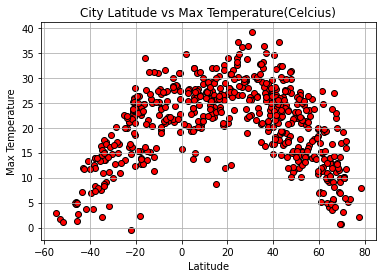

In [20]:
latitude = list(one_data['Lat'])
temperature = list(one_data['Max Temp'])
plt.scatter(latitude, temperature, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Max Temperature(Celcius)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)
plt.savefig('fig1.png')

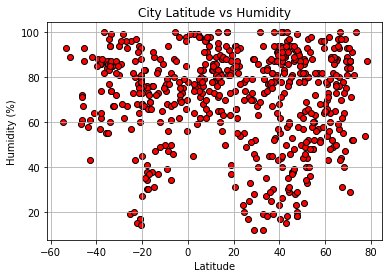

In [21]:
latitude = list(one_data['Lat'])
humidity = list(one_data['Humidity'])
plt.scatter(latitude, humidity, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig('fig2.png')

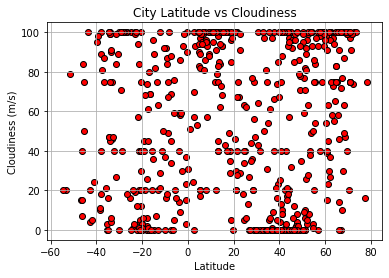

In [22]:
latitude = list(one_data['Lat'])
cloudiness = list(one_data['Cloudiness'])
plt.scatter(latitude, cloudiness, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (m/s)")
plt.grid(True)
plt.savefig('fig3.png')

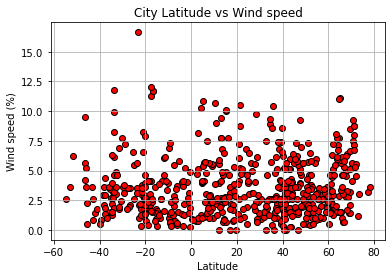

In [23]:
latitude = list(one_data['Lat'])
Windspeed = list(one_data['Wind speed'])
plt.scatter(latitude, Windspeed, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Wind speed")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (%)")
plt.grid(True)
plt.savefig('fig4.png')

In [24]:
n_hem = one_data.loc[one_data['Lat'] >= 0]
s_hem = one_data.loc[one_data['Lat'] < 0]


The r-squared is: 0.3763546555918573


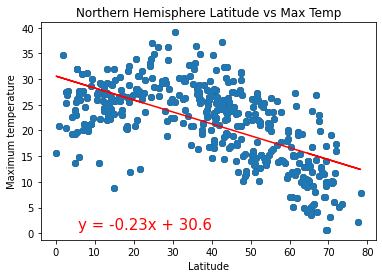

In [27]:
latitude = n_hem['Lat']
maxt = n_hem['Max Temp']
l = latitude.astype(float)
m = maxt.astype(float)
plt.scatter(l, m, marker="o", facecolors="red", edgecolors="black")
plt.title("Northern Hemisphere Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Maximum temperature")


x_values = l
y_values = m
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.6001429838426368


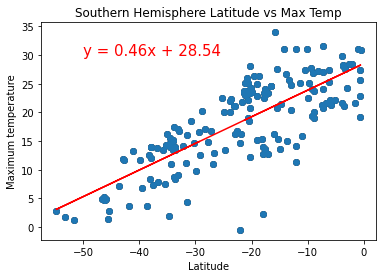

In [28]:
slatitude = s_hem['Lat']
smaxt = s_hem['Max Temp']
sl = slatitude.astype(float)
sm = smaxt.astype(float)
plt.scatter(sl, sm, marker="o", facecolors="red", edgecolors="black")
plt.title("Southern Hemisphere Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Maximum temperature")


x_values = sl
y_values = sm
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.0092809315265314


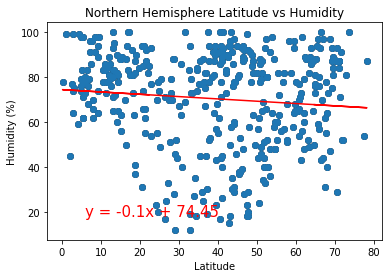

In [34]:
latitude = n_hem['Lat']
humidity = n_hem['Humidity']
l = latitude.astype(float)
h = humidity.astype(float)
plt.scatter(l, h, marker="o", facecolors="red", edgecolors="black")
plt.title("Northern Hemisphere Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


x_values = l
y_values = h
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,18),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.01870319635831165


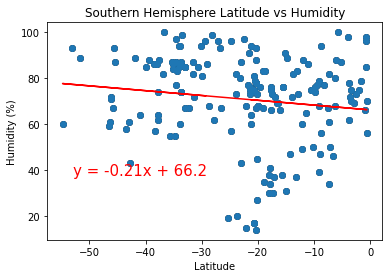

In [35]:
slatitude = s_hem['Lat']
shumidity = s_hem['Humidity']
sl = slatitude.astype(float)
sh = shumidity.astype(float)
plt.scatter(sl, sh, marker="o", facecolors="red", edgecolors="black")
plt.title("Southern Hemisphere Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


x_values = sl
y_values = sh
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-53,38),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.0013777506047986648


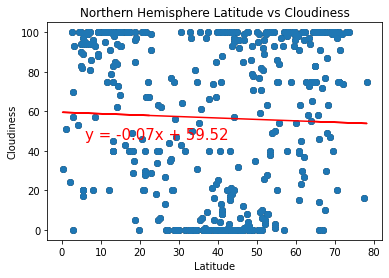

In [36]:
latitude = n_hem['Lat']
Cloudiness = n_hem['Cloudiness']
l = latitude.astype(float)
c = Cloudiness.astype(float)
plt.scatter(l, c, marker="o", facecolors="red", edgecolors="black")
plt.title("Northern Hemisphere Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


x_values = l
y_values = c
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,45.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.0022458506928522684


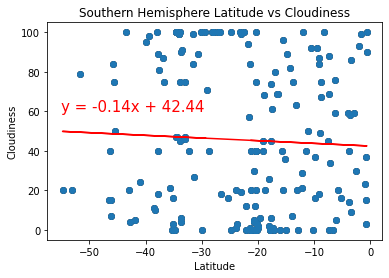

In [39]:
slatitude = s_hem['Lat']
sCloudiness = s_hem['Cloudiness']
sl = slatitude.astype(float)
sc = sCloudiness.astype(float)
plt.scatter(sl, sc, marker="o", facecolors="red", edgecolors="black")
plt.title("Southern Hemisphere Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


x_values = sl
y_values = sc
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.0012786477487467436


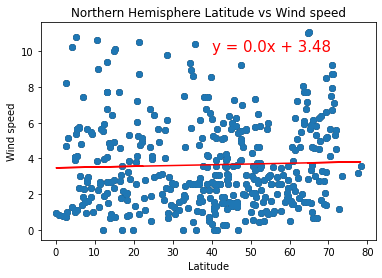

In [42]:
latitude = n_hem['Lat']
windspeed = n_hem['Wind speed']
l = latitude.astype(float)
w = windspeed.astype(float)
plt.scatter(l, w, marker="o", facecolors="red", edgecolors="black")
plt.title("Northern Hemisphere Latitude vs Wind speed")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")


x_values = l
y_values = w
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.01160685490814657


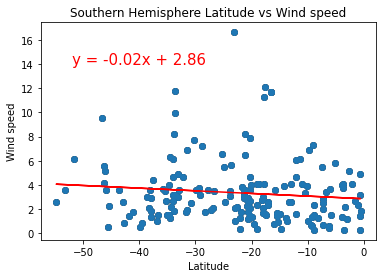

In [44]:
slatitude = s_hem['Lat']
swindspeed = s_hem['Wind speed']
sl = slatitude.astype(float)
sw = swindspeed.astype(float)
plt.scatter(sl, sw, marker="o", facecolors="red", edgecolors="black")
plt.title("Southern Hemisphere Latitude vs Wind speed")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")


x_values = sl
y_values = sw
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-52,14),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")